In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

gender_submission.csv
test.csv
train.csv



In [2]:
train = pd.read_csv('../input/train.csv', encoding="UTF-8")
test = pd.read_csv('../input/test.csv', encoding="UTF-8")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
use_columns = ['Pclass', 'Sex', 'Age', 'Fare']
y_name = ['Survived']
using = train[use_columns + y_name].dropna()
using.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
Fare        714 non-null float64
Survived    714 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.5+ KB


In [5]:
using.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [6]:
using.describe()

,Pclass,Age,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,34.694514,0.406162
std,0.838250,14.526497,52.918930,0.491460
min,1.000000,0.420000,0.000000,0.000000
25%,1.000000,20.125000,8.050000,0.000000
50%,2.000000,28.000000,15.741700,0.000000
75%,3.000000,38.000000,33.375000,1.000000
max,3.000000,80.000000,512.329200,1.000000


(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

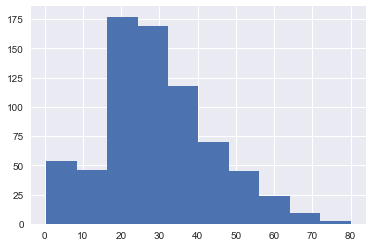

In [7]:
plt.hist(using['Age'], bins=10)

(array([ 577.,   89.,   28.,    2.,    9.,    6.,    0.,    0.,    0.,    3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

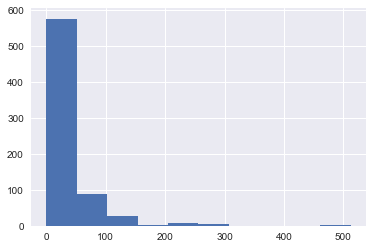

In [8]:
plt.hist(using['Fare'])

In [9]:
using['Sex'] = using['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
using.head()

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [11]:
train_X = using.drop(y_name, axis=1)
train_Y = using[y_name]
decision_tree = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None, 
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0, 
    max_features=None,
    random_state=None,
    max_leaf_nodes=None, 
    min_impurity_decrease=1e-07,
    class_weight=None,
    presort=False)
clf = decision_tree.fit(train_X, train_Y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
test_X = test[use_columns]
test_X.info()
test_X['Age'] = test_X['Age'].fillna(test_X['Age'].mean())
test_X.info()
test_X['Fare'] = test_X['Fare'].fillna(test_X['Fare'].mean())
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       332 non-null float64
Fare      417 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       418 non-null float64
Fare      417 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       418 non-null float64
Fare      418 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


/Users/kazuya/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kazuya/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
test_X['Sex'] = test_X['Sex'].map({'female': 1, 'male': 0}).astype('int')
test_X.head()

/Users/kazuya/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875


In [15]:
decision_tree.score(train_X, train_Y)

0.98459383753501406

In [16]:
Y_pred = decision_tree.predict(test_X)
Y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [17]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [21]:
submission.to_csv('../output/submission.csv', index=False)

In [22]:
train_Y.columns.values

array(['Survived'], dtype=object)

In [27]:
from sklearn import tree
tree.export_graphviz(clf,
                     out_file="../output/tree.dot",
                     filled=True,
                     rounded=True)

In [25]:
import pydotplus
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
 
graph.write_pdf("graph.pdf")

True